<div style="background-color:white;padding:20px;">

<p style=" color : red; font-size : 40px; font-family : consulas; text-align : left;">

<b>
Simulate Random Variables, With Using The Inverse Transform Method
</b>
</p>

<br><hr><hr><br><br><br><br>


<p style=" color : darkblue; font-size : 25px; font-family : courier new; text-align : left;">
<br><br>
<b>
Example I 
</b>
</p>


<hr><br><br>
<p style=" color : darkblue; font-size : 20px; font-family : courier new; text-align : left;">
<b>
Using the inverse transform method, simulate a random variable with the following density function.
</b>
</p>
<br>

$$
 f(x) = \frac{1}{2}x + \frac{1}{2}, \quad 0 < x < 1, 
$$

#### Answer:


$$
\begin{aligned}
& F_X(x) = \int_0^x f(x)~dx = \int_0^x \frac{1}{2}x + \frac{1}{2} ~dx = \\
& \left. \frac{x^2}{2} + \frac{x}{2} \right|_0^x = \frac{x^2}{2} + \frac{x}{2}
\end{aligned}
$$

based on  <a  href="https://math.stackexchange.com/questions/868400/showing-that-y-has-a-uniform-distribution-if-y-fx-where-f-is-the-cdf-of-contin"> this link </a> $~~F_X(x) \sim \text{Unif}(0, ~1) \implies $

$$
\begin{aligned}
& u = \frac{x^2}{2} + \frac{x}{2}  \quad \overset{{\tiny \text{Using} ~\Delta~\text{Method}}}{\implies} \\
& x = \frac{-\frac{1}{2} \pm \sqrt{\frac{1}{4} + 2u}}{1} \implies \\
& x_1 = -\frac{1}{2} +  \sqrt{\frac{1}{4} + 2u}, \\
& x_2 = -\frac{1}{2} -  \sqrt{\frac{1}{4} + 2u} \quad \overset{{\tiny 0 < x < 1}}{\to} \quad \text{Unacceptable} \implies \\
& x = -\frac{1}{2} +  \sqrt{\frac{1}{4} + 2u} \implies \\
& U = [0.1915,~ 0.6221,~ 0.4377,~ 0.7854,~ 0.78] \implies \\
& X = [0.2956,~ 0.7224,~ 0.5609,~ 0.8493,~ 0.8453]
\end{aligned}
$$

</div>

## simulate in python

In [7]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from sympy.stats import ContinuousRV, P, E, variance, cdf
from sympy import Interval, Symbol, log, exp, sqrt, Rational

In [10]:
## define X as a Random Variable

x = Symbol('x')
pDf =  x + Rational(1, 2)
X = ContinuousRV(x, density = pDf, set = Interval.open(0, 1))

In [11]:
## get cumulative function (CDF) of X 

cdf(X)(x).simplify()

Piecewise((Piecewise((0, x < 0), ((Min(1, x) + 1)*Min(1, x)/2, True)), x >= 0), (0, True))

In [12]:
## get expectation of X 

E(X)

7/12

In [13]:
## get Variance of X

variance(X)

11/144

In [31]:
## get above result 

U = stats.uniform.rvs(0, 1, size = 5, random_state = 1234)
print(U.round(4))
def f(u):
    a = -1/2 + sqrt(1/4 + 2*u)
    return a
f = np.vectorize(f)
xx = f(U)
res = list(map(lambda x: x.round(4), xx))
res

[0.1915 0.6221 0.4377 0.7854 0.78  ]


[0.2956, 0.7224, 0.5609, 0.8493, 0.8453]

In [32]:
## simulate with transform method and compare variance and expectation of simulation with Text 
n = 10**5
U1 = stats.uniform.rvs(0, 1, size = n, random_state = n)
XX = f(U1)
sim_var = XX.var()
sim_mean = XX.mean()
print("""
Mean of Simulation: {}
Mean of Theory: {}
Variance of Simulation: {}
Variance of Theory: {}
""".format(sim_mean, 7/12, sim_var, 11/144))


Mean of Simulation: 0.584672637901349
Mean of Theory: 0.5833333333333334
Variance of Simulation: 0.0758054328780650
Variance of Theory: 0.0763888888888889



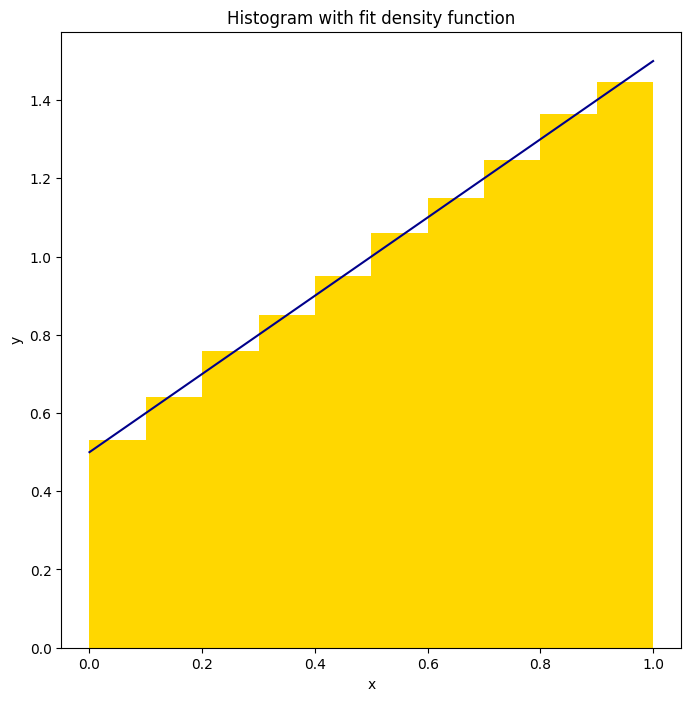

In [58]:
## define density function 
def f2(x): 
    res = x + 1/2
    return res

f2 = np.vectorize(f2)

## create histogram and fit density function 

fig, ax = plt.subplots(figsize  = (8, 8))
XX = np.array(XX, dtype = float)
m1 = XX.min(); m2 = XX.max()
xs = np.linspace(m1, m2, 100000)
ys = f2(xs)
ys = np.array(ys, dtype = float)
ax.hist(XX, color = "gold", density = True)
ax.plot(xs, ys, color = "darkblue")
ax.set_title("Histogram with fit density function")
ax.set_xlabel("x")
ax.set_ylabel("y")
plt.show()

***
***